In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from os import path
path1 = '/content/drive/MyDrive/forest_area.csv'
df1 = pd.read_csv(path1)

In [4]:
from os import path
path2 = '/content/drive/MyDrive/land_area.csv'
df2 = pd.read_csv(path2)

In [5]:
from os import path
path3 = '/content/drive/MyDrive/region.csv'
df3 = pd.read_csv(path3)

In [6]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['country_code', 'country_name', 'year', 'forest_area_sqkm'], dtype='object')
Index(['country_code', 'country_name', 'year', 'total_area_sq_mi'], dtype='object')
Index(['country_name', 'country_code', 'region', 'income_group'], dtype='object')


In [7]:
merged_data=pd.merge(df1,df2,on=['country_code','year'])

In [8]:
final_data=pd.merge(merged_data,df3,on=['country_code'])

In [9]:


print(final_data.columns)

Index(['country_code', 'country_name_x', 'year', 'forest_area_sqkm',
       'country_name_y', 'total_area_sq_mi', 'country_name', 'region',
       'income_group'],
      dtype='object')


In [10]:
final_data = final_data.drop(columns=['country_name_x','country_name_y'])

In [11]:
final_data['total_area_sqkm'] = (final_data['total_area_sq_mi']*2.59).round(3)
final_data['forest_area_percentage'] = ((final_data['forest_area_sqkm'] / final_data['total_area_sqkm'])* 100).round(2)
forestation_view=final_data[['country_code','country_name','year','forest_area_sqkm','total_area_sq_mi','region','income_group','forest_area_percentage','total_area_sqkm']]

In [12]:


forest_area_1990 = final_data[(final_data['country_name'] == 'World') & (final_data['year'] == 1990)]['forest_area_sqkm'].values[0]
print(f"Forest Area in 1990: {forest_area_1990} km2")




Forest Area in 1990: 41282694.9 km2


In [13]:
forest_area_2016 = final_data[(final_data['country_name'] == 'World') & (final_data['year'] == 2016)]['forest_area_sqkm'].values[0]
print(f"Forest Area in 2016: {forest_area_2016} km2")


Forest Area in 2016: 39958245.9 km2


In [14]:
world_data = final_data[final_data['country_name'] == 'World'].sort_values(by='year')
world_data['forest_area_percentage'] = world_data['forest_area_sqkm'] / world_data['total_area_sqkm'] * 100
print(world_data[['year', 'forest_area_sqkm', 'total_area_sqkm', 'forest_area_percentage']])


      year  forest_area_sqkm  total_area_sqkm  forest_area_percentage
5769  1990        41282694.9     1.273285e+08               32.422204
5573  1991        41210027.5     1.273304e+08               32.364647
5356  1992        41137360.5     1.273304e+08               32.307562
5144  1993        41064693.4     1.273267e+08               32.251432
4925  1994        40992025.9     1.273150e+08               32.197330
4711  1995        40919358.7     1.273120e+08               32.140996
4498  1996        40846691.3     1.273116e+08               32.084029
4282  1997        40774024.2     1.273809e+08               32.009517
4069  1998        40701356.7     1.273549e+08               31.958994
3852  1999        40628689.7     1.273617e+08               31.900237
3640  2000        40556022.3     1.273755e+08               31.839743
3422  2001        40510303.3     1.273743e+08               31.804130
3210  2002        40464584.1     1.273722e+08               31.768784
2990  2003        40

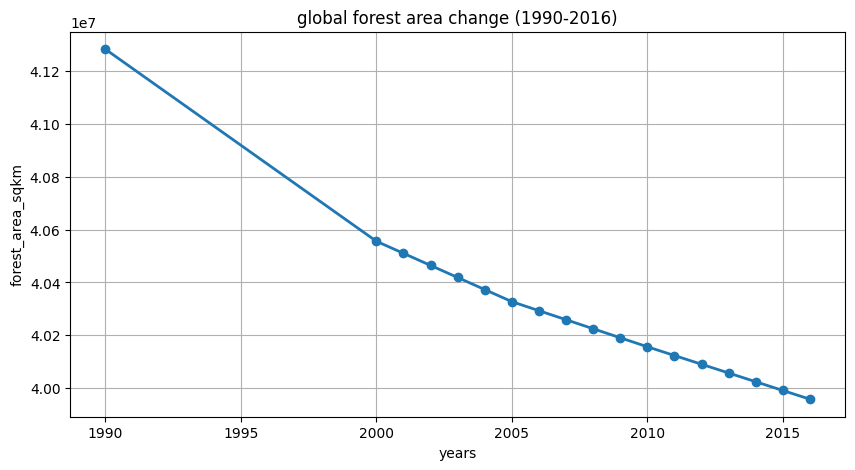

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns
years = [1990,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
forest_area = world_data[world_data['year'].isin(years)]['forest_area_sqkm']
plt.figure(figsize=(10, 5))
plt.xlabel("years")
plt.ylabel("forest_area_sqkm")
color=sns.color_palette()
marker='o' ; linestyle='-' ; linewidth=2 # added semicolon to separate the assignments
plt.title("global forest area change (1990-2016)")
plt.plot(years,forest_area, marker=marker, linestyle=linestyle, linewidth=linewidth) # added arguments to plt.plot
plt.grid(True)
plt.show()



In [22]:
world_data['previous_year_area_sqkm'] = world_data['forest_area_sqkm'].shift(1)
world_data['change_in_forest_area_sqkm'] = world_data['forest_area_sqkm'] - world_data['previous_year_area_sqkm']

print(world_data[['year', 'forest_area_sqkm', 'previous_year_area_sqkm', 'change_in_forest_area_sqkm']].to_string())

      year  forest_area_sqkm  previous_year_area_sqkm  change_in_forest_area_sqkm
5769  1990        41282694.9                      NaN                         NaN
5573  1991        41210027.5               41282694.9                    -72667.4
5356  1992        41137360.5               41210027.5                    -72667.0
5144  1993        41064693.4               41137360.5                    -72667.1
4925  1994        40992025.9               41064693.4                    -72667.5
4711  1995        40919358.7               40992025.9                    -72667.2
4498  1996        40846691.3               40919358.7                    -72667.4
4282  1997        40774024.2               40846691.3                    -72667.1
4069  1998        40701356.7               40774024.2                    -72667.5
3852  1999        40628689.7               40701356.7                    -72667.0
3640  2000        40556022.3               40628689.7                    -72667.4
3422  2001      

In [26]:

world_data['previous_year_area_percentage'] = world_data['forest_area_percentage'].shift(1)
world_data['change_in_forest_area_percentage'] = world_data['forest_area_percentage'] - world_data['previous_year_area_percentage']

print(world_data[['year', 'forest_area_percentage', 'previous_year_area_percentage', 'change_in_forest_area_percentage']].to_string())

      year  forest_area_percentage  previous_year_area_percentage  change_in_forest_area_percentage
5769  1990               32.422204                            NaN                               NaN
5573  1991               32.364647                      32.422204                         -0.057556
5356  1992               32.307562                      32.364647                         -0.057085
5144  1993               32.251432                      32.307562                         -0.056130
4925  1994               32.197330                      32.251432                         -0.054102
4711  1995               32.140996                      32.197330                         -0.056334
4498  1996               32.084029                      32.140996                         -0.056967
4282  1997               32.009517                      32.084029                         -0.074512
4069  1998               31.958994                      32.009517                         -0.050523


In [27]:

total_area_2016 = final_data[(final_data['year'] == 2016) & (final_data['country_name'] == 'World')]['total_area_sqkm'].sum()

print(f"Total Area in 2016: {total_area_2016} km2")



Total Area in 2016: 127354641.436 km2


In [28]:

forest_change = round(forest_area_1990 - forest_area_2016, 2)

precent_change = (forest_change / forest_area_1990)*100
print ("forest_change:",forest_change,"km2")
print ("precent_change:",precent_change,"%")

forest_change: 1324449.0 km2
precent_change: 3.20824258980244 %


In [29]:
final_data['distance_from_total_area'] = abs(final_data['total_area_sqkm'] - forest_change)
closest_country = final_data.loc[final_data['distance_from_total_area'].idxmin()]
print(f"closest country total area to {forest_change} sqkm in 2016 is {closest_country['country_name']} with a difference of {closest_country['distance_from_total_area']} sqkm.")

closest country total area to 1324449.0 sqkm in 2016 is Peru with a difference of 44449.01099999994 sqkm.


In [30]:
forest_area_percentage_1990 = final_data[final_data['year'] == 1990].groupby('region').agg(forest_area_percentage=('forest_area_sqkm',lambda x:(x.sum()/final_data.loc[x.index,'total_area_sqkm'].sum()) * 100))
forest_area_percentage_2016 = final_data[final_data['year'] == 2016].groupby('region').agg(forest_area_percentage=('forest_area_sqkm',lambda x:(x.sum()/final_data.loc[x.index,'total_area_sqkm'].sum()) * 100))
region_forest = pd.merge(forest_area_percentage_1990, forest_area_percentage_2016, on='region',suffixes=('_90','_16'))
region_forest = region_forest.reset_index()
print(region_forest.to_string())
print(region_forest.columns)

                       region  forest_area_percentage_90  forest_area_percentage_16
0         east asia & pacific                  25.774191                  26.358677
1       europe & central asia                  37.245701                  38.047697
2   latin america & caribbean                  51.029980                  46.162072
3  middle east & north africa                   1.775241                   2.068265
4               north america                  35.651179                  36.039361
5                  south asia                  16.510767                  17.505863
6          sub-saharan africa                  27.433627                  25.750855
7                       world                  32.422204                  31.375571
Index(['region', 'forest_area_percentage_90', 'forest_area_percentage_16'], dtype='object')


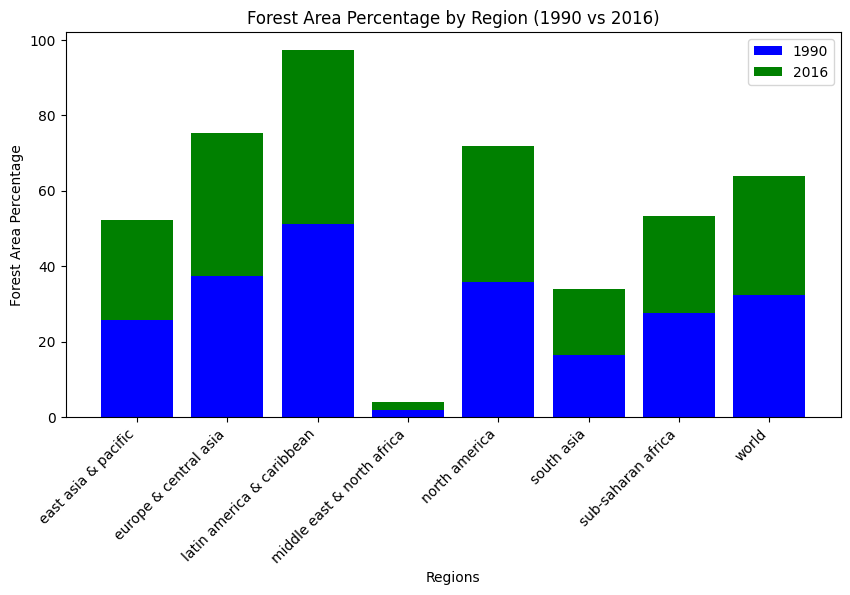

In [46]:
regions = region_forest['region']
forest_90 = region_forest['forest_area_percentage_90']
forest_16 = region_forest['forest_area_percentage_16']
plt.figure(figsize=(10, 5))
plt.bar(regions, forest_90, label='1990', color='blue')
plt.bar(regions, forest_16, bottom = forest_90, label='2016', color='green')
plt.title('Forest Area Percentage by Region (1990 vs 2016)')
plt.xlabel('Regions')
plt.ylabel('Forest Area Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [47]:
highest_forest_2016 = region_forest.loc[region_forest['forest_area_percentage_16'].idxmax()]
print(f"The region with the highest forest area percentage in 2016 is {highest_forest_2016['region']} with a percentage of {highest_forest_2016['forest_area_percentage_16']}%.")

The region with the highest forest area percentage in 2016 is latin america & caribbean with a percentage of 46.16207218703159%.


In [48]:
lowest_forest_2016 = region_forest.loc[region_forest['forest_area_percentage_16'].idxmin()]
print(f"The region with the lowest forest area percentage in 2016 is {lowest_forest_2016['region']} with a percentage of {lowest_forest_2016['forest_area_percentage_16']}%.")

The region with the lowest forest area percentage in 2016 is middle east & north africa with a percentage of 2.068264832897785%.


In [49]:
highest_forest_1990 = region_forest.loc[region_forest['forest_area_percentage_90'].idxmax()]
print(f"The region with the highest forest area percentage in 1990 is {highest_forest_1990['region']} with a percentage of {highest_forest_1990['forest_area_percentage_90']}%.")

The region with the highest forest area percentage in 1990 is latin america & caribbean with a percentage of 51.02997989253516%.


In [50]:
lowest_forest_1990 = region_forest.loc[region_forest['forest_area_percentage_90'].idxmin()]
print(f"The region with the lowest forest area percentage in 1990 is {lowest_forest_1990['region']} with a percentage of {lowest_forest_1990['forest_area_percentage_90']}%.")

The region with the lowest forest area percentage in 1990 is middle east & north africa with a percentage of 1.7752406627868904%.


In [51]:
region_forest['change_in_forest_area_percentage'] =(region_forest['forest_area_percentage_16'] - region_forest['forest_area_percentage_90'])
decreased_forest = region_forest.loc[region_forest['change_in_forest_area_percentage'] <= 0]
print(decreased_forest.to_string())


                      region  forest_area_percentage_90  forest_area_percentage_16  change_in_forest_area_percentage
2  latin america & caribbean                  51.029980                  46.162072                         -4.867908
6         sub-saharan africa                  27.433627                  25.750855                         -1.682772
7                      world                  32.422204                  31.375571                         -1.046633


In [52]:
forest_area_1990 = final_data[(final_data['year'] == 1990)]
forest_area_2016 = final_data[(final_data['year'] == 2016)]
difference_in_forest_area = pd.merge(forest_area_1990[['country_name', 'forest_area_sqkm']], forest_area_2016[['country_name', 'forest_area_sqkm']], on='country_name', suffixes=['_1990', '_2016'])
difference_in_forest_area = difference_in_forest_area[difference_in_forest_area['country_name'] != 'World']
difference_in_forest_area['difference'] = difference_in_forest_area['forest_area_sqkm_1990'] - difference_in_forest_area['forest_area_sqkm_2016']
top_5_decreased_countries = difference_in_forest_area.sort_values(by='difference', ascending=False).head(5)
print(top_5_decreased_countries)


    country_name  forest_area_sqkm_1990  forest_area_sqkm_2016  difference
26        Brazil              5467050.0             4925540.00   541510.00
85     Indonesia              1185450.0              903256.02   282193.98
203      Myanmar               392180.0              284946.00   107234.00
215      Nigeria               172340.0               65834.00   106506.00
161     Tanzania               559200.0              456880.00   102320.00


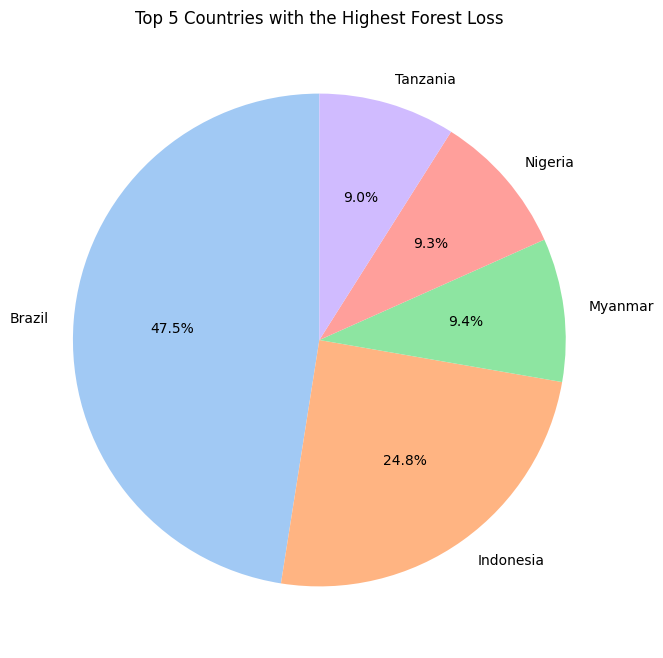

In [60]:
countries = top_5_decreased_countries['country_name']
forest_loss = top_5_decreased_countries['difference']
plt.figure(figsize=(8,8))
plt.pie(forest_loss, labels=countries, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Top 5 Countries with the Highest Forest Loss')
plt.show()

In [54]:
forest_area_percentage_1990 = final_data[final_data['year'] == 1990]
forest_area_percentage_2016 = final_data[final_data['year'] == 2016]
percentage_difference = pd.merge(forest_area_percentage_1990[['country_name', 'forest_area_percentage']], forest_area_percentage_2016[['country_name', 'forest_area_percentage']],on='country_name', suffixes=('_1990','_2016'))
percentage_difference['percentage_difference'] = percentage_difference['forest_area_percentage_1990'] - percentage_difference['forest_area_percentage_2016']
top_5_decreased_percentage_countries = percentage_difference.sort_values(by='percentage_difference', ascending=False).head(5)
pd.set_option('display.max_rows', None)
print(top_5_decreased_percentage_countries.to_string())


                  country_name  forest_area_percentage_1990  forest_area_percentage_2016  percentage_difference
81                    Honduras                        72.71                        39.97                  32.74
123  Korea, Dem. People S Rep.                        68.11                        40.73                  27.38
178                   Zimbabwe                        57.29                        35.54                  21.75
100                   Cambodia                        73.33                        52.85                  20.48
155                Timor-Leste                        64.96                        45.38                  19.58


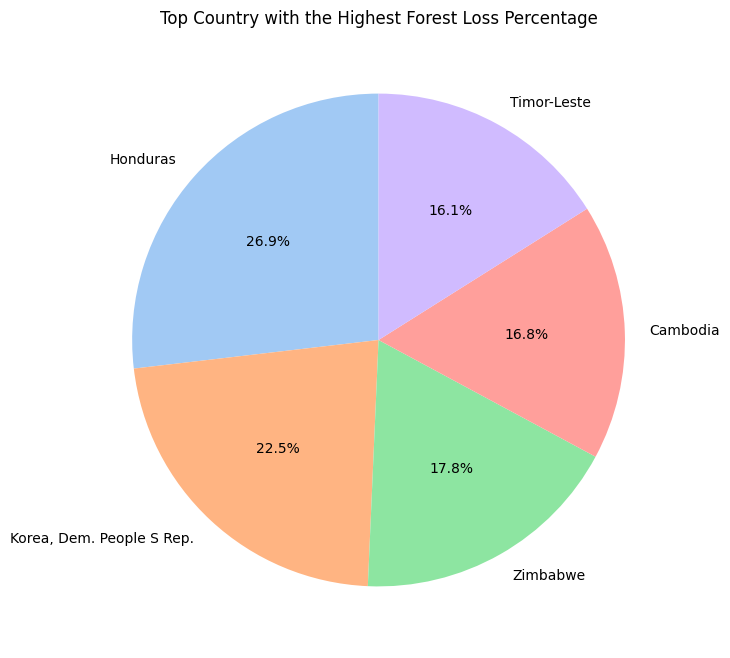

In [59]:
top_countries = top_5_decreased_percentage_countries['country_name']
forest_loss_percentage = top_5_decreased_percentage_countries['percentage_difference']
plt.figure(figsize=(8,8))
plt.pie(forest_loss_percentage, labels=top_countries, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Top Country with the Highest Forest Loss Percentage')
plt.show()

In [61]:
usa_forest_percentage_2016 = final_data[(final_data['country_name'] == 'United States') & (final_data['year'] == 2016)]['forest_area_percentage'].values[0]
higher_forest_percentage_countries = final_data[(final_data['forest_area_percentage'] > usa_forest_percentage_2016) & (final_data['year'] == 2016)]
higher_forest_percentage_countries = higher_forest_percentage_countries.sort_values(by='forest_area_percentage', ascending=False)
print(higher_forest_percentage_countries[['country_name','forest_area_percentage']])

                        country_name  forest_area_percentage
159                         Suriname                   98.26
49             Micronesia, Fed. Sts.                   91.86
50                             Gabon                   90.04
165                       Seychelles                   88.41
134                            Palau                   87.61
5694                  American Samoa                   87.50
63                            Guyana                   83.90
89                           Lao Pdr                   82.11
152                  Solomon Islands                   77.86
135                 Papua New Guinea                   74.10
45                           Finland                   73.11
13                            Bhutan                   72.48
12                 Brunei Darussalam                   72.11
107                 Marshall Islands                   70.22
56                     Guinea-Bissau                   69.77
185   St. Vincent And Th

In [73]:
countries_with_higher_forest_percentage = higher_forest_percentage_countries['country_name']
percentage_value = higher_forest_percentage_countries['forest_area_percentage']
fig = px.treemap(higher_forest_percentage_countries, path=['region', 'country_name'], values='forest_area_percentage',
title='Countries with Higher Forest Percentage in 2016 than United States', color='forest_area_percentage',
color_continuous_scale='Blues')
fig.show()
